In [157]:
# Bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
# Leitura dos dados

demandareal = pd.read_excel("./setembro2021.xlsx")
demandareal = demandareal["CONSUMO"].values
teste = np.reshape(demandareal,(30,24))


In [159]:
# Função objetivo a ser minimizada, com penalidade de demanda

def fitness(individuo,demanda,volume_maximo,volume_minimo,custo,vazao,check = 0):

    volume = volume_maximo

    fit = np.sum(custo[individuo])
    volume_t = individuo*vazao - demanda
    volume_t = np.array([volume] + list(volume_t))
    volume_t = np.cumsum(volume_t)
    volume_penal = volume_t[(volume_t <volume_minimo)| (volume_t  >volume_maximo)]

    if(check == 1):
        print(volume_penal,fit,len(volume_penal))

    fit += fit*(np.sum(np.abs(volume_penal-volume)))
    return fit



In [160]:
# Definição da tarifa:

def S(t):
    hora = t % 24  # Calcula a hora do dia a partir do índice t
    if hora >= 17 and hora < 21:  # Horário de ponta
        return 1.63527
    else:  # Horário fora de ponta
        return 0.62124
        
tarifa = np.array([S(i) for i in range(len(demandareal))])
tarifa.shape

(720,)

In [161]:
# Seleção

def selecao(populacao, aptidao):
    aid = np.random.choice(len(populacao), size=2, replace=False)
    bid = np.random.choice(len(populacao), size=2, replace=False)
    
    aid = aid[np.argmax(aptidao[aid])]
    bid = bid[np.argmax(aptidao[bid])]
    a = populacao[aid]
    b = populacao[bid]
    apt = aptidao[aid]
    bpt = aptidao[bid]
    
    return np.array([a, b]), np.array([apt, bpt])

In [162]:
# Cruzamento

def cruzamento(pais,aptidao,procruz):
    if(np.random.rand()<procruz):
        p = 1 - aptidao/(np.sum(aptidao))
        filho = np.array([pais[0][i] if(np.random.rand() < p[0]) else pais[1][i] for i in range(pais.shape[1])])
    else:
        filho = pais[np.argmin(aptidao),:]
    return filho 

In [163]:
# Mutação

def mutacao(individuo,probmut):
    n=len(individuo)
    copia = np.copy(individuo)
    idx = np.random.choice(n,size=int(np.ceil(probmut*n)),replace=False)
    copia[idx] = ~individuo[idx]
    return copia

In [164]:
def AG(demandareal, tarifa, volume_maximo, volume_minimo, vazao, procruz, probmut, num_individuals):
    
    np.random.seed(424)
    num_genes = len(demandareal)
    populacao = np.random.choice([True, False], size=(num_individuals, num_genes))
    F = lambda individuo: fitness(individuo, demandareal, volume_maximo, volume_minimo, tarifa, vazao)
    aptidao = np.array([F(individuo) for individuo in populacao])

    historico = []
    contador = 0

    while True:
        
        pais,apt = selecao(populacao,aptidao)

        filho = cruzamento(pais,apt,procruz)
        filho = mutacao(filho,probmut)

        populacao[np.argmax(aptidao),:] = filho
        aptidao[np.argmax(aptidao)] = F(filho)

        historico.append([aptidao[np.argmin(aptidao)],np.mean(aptidao)])

        if(np.mean(aptidao) - aptidao[np.argmin(aptidao)] < 1e-5):
            break
        contador += 1
        if(contador%1000 == 0):
            print(aptidao[np.argmin(aptidao)])
        if(aptidao[np.argmin(aptidao)] < 6000):
            break
        
    historico = np.array(historico)
    return historico, populacao[np.argmin(aptidao)]


In [165]:
# Número de indivíduos na população inicial
volume_maximo = 5
volume_minimo = 2
vazao = 2

# Parâmetros genéticos:

procruz = 0.8
probmut = 0.05
num_individuals = 20 #tamanho da população
#geracoes = 8000

# Algoritmo Genético:

dados,melhor_valor = AG(demandareal, tarifa, volume_maximo, volume_minimo, vazao, procruz, probmut, num_individuals)


26576779.14669243
20761327.05979862
16839394.016919322
15155799.53545532
13571370.026221821
11448625.67956712
10945714.952733617
10945714.952733617
8891765.475855617
8416258.461930018
8416258.461930018
8337830.223210016
8325324.321583516
7983799.936294216
7983799.936294216
7816328.135107517
6737484.312010217
6737484.312010217
6737484.312010217
6737484.312010217
6737484.312010217
6507027.199137915
6335284.221331213
5939239.329318914
5939239.329318914
5939239.329318914
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4992941.586566415
4399920.82716241
4399920.82716241
4399920.82716241
4399920.82716241
4399920.82716241
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540614012
3939631.540

KeyboardInterrupt: 

In [ ]:
fitness(melhor_valor, demandareal, volume_maximo, volume_minimo, tarifa, vazao,1)


[ 6.4900000e+00  6.4200000e+00  6.3800000e+00  6.3400000e+00
  6.3100000e+00  6.2900000e+00  6.2600000e+00  6.2400000e+00
  6.2100000e+00  5.5700000e+00  6.6500000e+00  6.6500000e+00
  6.6500000e+00  6.6500000e+00  6.2500000e+00  5.5800000e+00
  7.5100000e+00  7.4300000e+00  7.3500000e+00  7.2800000e+00
  7.2200000e+00  7.2100000e+00  7.2100000e+00  7.2100000e+00
  7.2100000e+00  7.2100000e+00  6.1000000e+00  6.3500000e+00
  6.3500000e+00  6.3500000e+00  6.3500000e+00  6.3500000e+00
  6.3500000e+00  6.3400000e+00  6.2900000e+00  6.2400000e+00
  6.1800000e+00  6.1200000e+00  6.0700000e+00  6.0600000e+00
  6.0600000e+00  8.0600000e+00  8.0600000e+00  7.1200000e+00
  5.5400000e+00  6.5400000e+00  6.5400000e+00  6.5400000e+00
  5.4400000e+00  1.3200000e+00  1.0300000e+00  9.6000000e-01
  9.3000000e-01  8.9000000e-01  8.6000000e-01  8.6000000e-01
  8.6000000e-01  1.9700000e+00  1.6700000e+00  1.5400000e+00
  1.4600000e+00  5.4500000e+00  5.4500000e+00  5.4500000e+00
  5.4500000e+00  5.45000

18942.20606520106

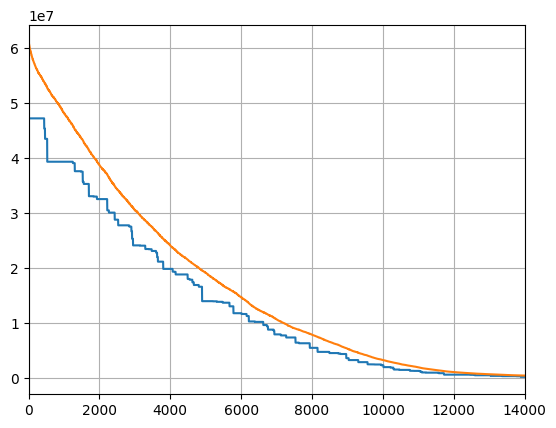

In [ ]:
plt.plot(range(len(dados.T[0])), dados.T[0])
plt.plot(range(len(dados.T[0])), dados.T[1])
plt.grid()
plt.xlim(0, 14000)
plt.show()